In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
# import dataset
dataset = pd.read_csv(r"C:\Users\Mohan Patil\OneDrive\Desktop\Datasets\delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA And Data Visualization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

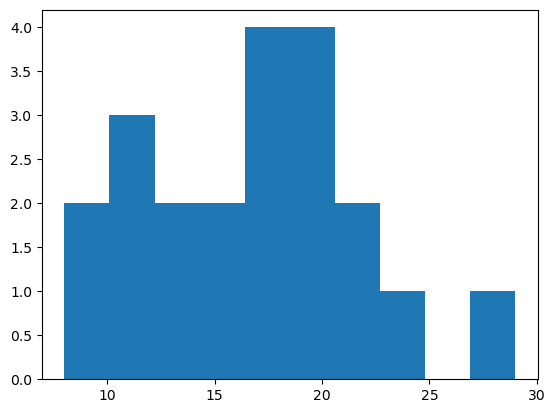

In [4]:
plt.hist(dataset['Delivery Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

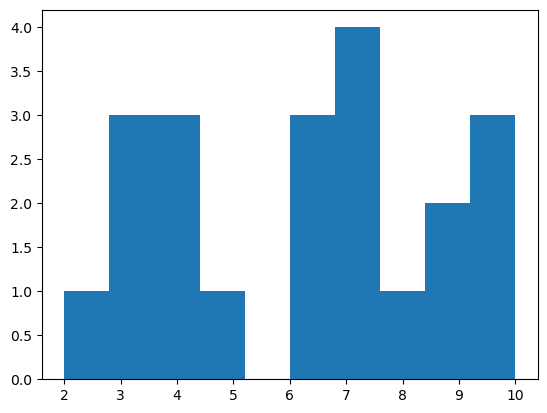

In [5]:
plt.hist(dataset['Sorting Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a1eea67820>,
 'caps': [<matplotlib.lines.Line2D at 0x2a1eea67dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a1eea67550>],
 'medians': [<matplotlib.lines.Line2D at 0x2a1eea793a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a1eea79670>],
 'means': []}

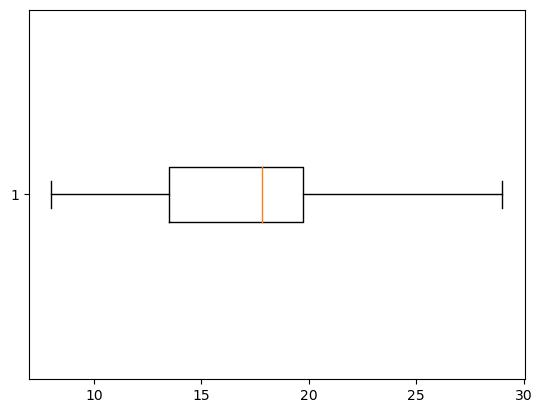

In [6]:
plt.boxplot(dataset['Delivery Time'],0,"rs",0)

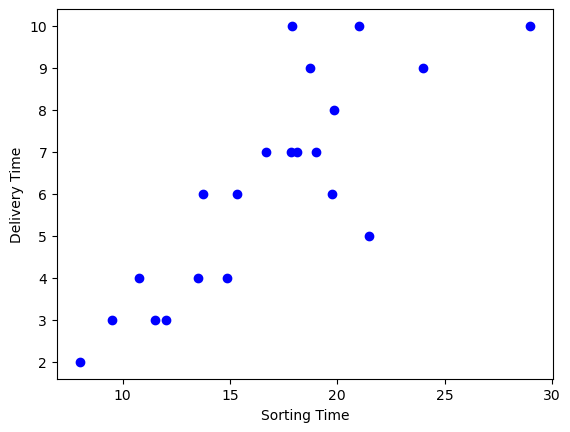

In [7]:
plt.plot(dataset['Delivery Time'],dataset['Sorting Time'],"bo")
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

C:\Users\Mohan Patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

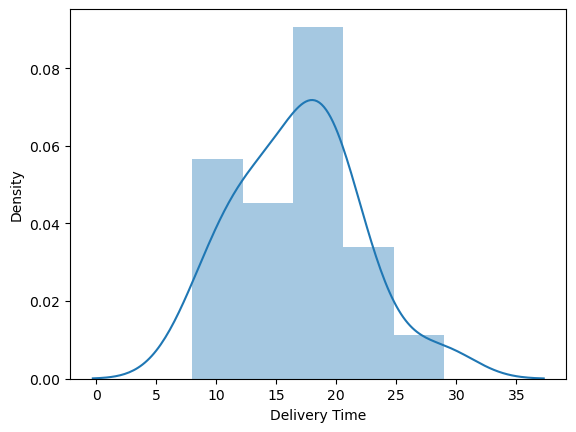

In [8]:
sns.distplot(dataset['Delivery Time'])

C:\Users\Mohan Patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

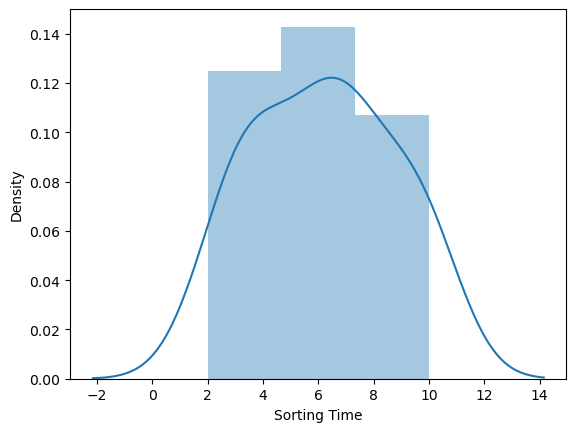

In [9]:
sns.distplot(dataset['Sorting Time'])

# Correlation Analysis

In [10]:
dataset['Delivery Time'].corr(dataset['Sorting Time'])

0.8259972607955326

In [11]:
np.corrcoef(dataset['Delivery Time'],dataset['Sorting Time'])

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [13]:
dataset1=dataset.rename(columns={'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},inplace=True)

In [14]:
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Build Linear Regression Model

In [16]:
model = smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [17]:
# Coefficient parameter
model.params
# y-intercept (B0)-6.582734
# sorting_time is Coeff.of Reg line (B1)-1.649020

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        16:11:45   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.conf_int(0.05) # 95% Confidence Interval

,0,1
Intercept,2.979134,10.186334
sorting_time,1.108673,2.189367


In [20]:
# Finding tvalues and pvalues
model.pvalues,model.tvalues

(Intercept       0.001147
 sorting_time    0.000004
 dtype: float64,
 Intercept       3.823349
 sorting_time    6.387447
 dtype: float64)

In [21]:
# Reg.Equ : delivery_time=B0+B1*sorting_time

In [22]:
# Finding RSquared Value
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [23]:
pred = model.predict(pd.DataFrame(dataset['sorting_time']))
pred.corr(dataset.delivery_time)

0.8259972607955325

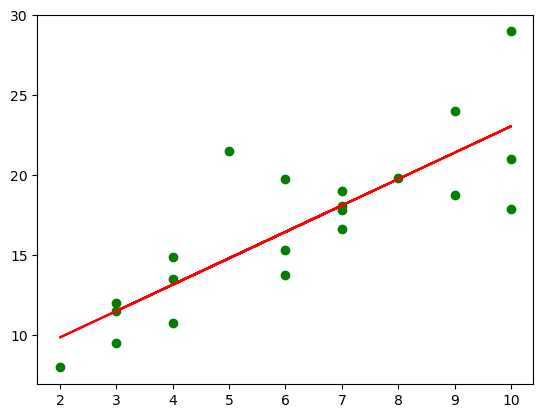

In [24]:
plt.scatter(x=dataset['sorting_time'],y=dataset['delivery_time'],color='green');
plt.plot(dataset['sorting_time'],pred,color='red')

# Model Prediction

In [25]:
# manual Prediction for Sorting time 5
delivery_time = (6.582734)+(1.649020)*(5)
delivery_time

14.827834

In [26]:
# Automatic Prediction for say sorting time 5,8
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [27]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [28]:
model.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64

## Transforming variable for accuracy

In [29]:
model_2 = smf.ols('delivery_time~np.log(sorting_time)',data=dataset).fit()
model_2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [30]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           2.64e-06
Time:                        16:20:55   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
print(model_2.conf_int(0.01)) # 99% confidence level

                             0          1
Intercept            -5.862666   8.182033
np.log(sorting_time)  5.115458  12.971369


In [32]:
# Reg.Equ : Delivery_time=B0+B1*YearsExperience

In [33]:
# Finding p_value And t_value
model_2.pvalues,model_2.tvalues

(Intercept               0.641980
 np.log(sorting_time)    0.000003
 dtype: float64,
 Intercept               0.472460
 np.log(sorting_time)    6.586789
 dtype: float64)

In [34]:
pred2 = model_2.predict(pd.DataFrame(dataset['sorting_time']))
pred2.corr(dataset.delivery_time)

0.8339325279256242

In [35]:
# Model2 Prediction for sorting time 5
delivery_time= (1.159684) + (9.043413)*(5)
delivery_time

46.376749

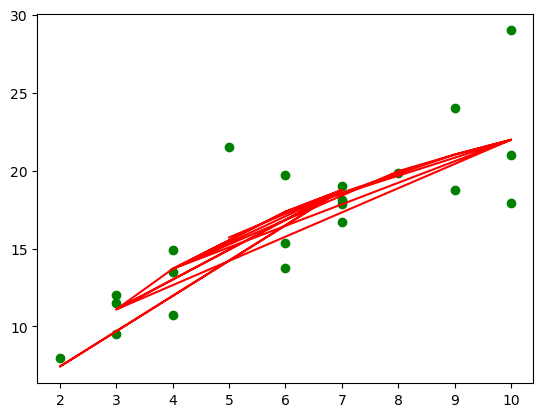

In [37]:
plt.scatter(x=dataset['sorting_time'],y=dataset['delivery_time'],color='green');
plt.plot(dataset['sorting_time'],pred2,color='red')

## Exponential Transformation model-3

In [38]:
model_3 = smf.ols('np.log(delivery_time)~sorting_time',data=dataset).fit()
model_3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [39]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 26 Apr 2023   Prob (F-statistic):           1.59e-06
Time:                           16:27:13   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print(model_3.conf_int(0.01)) # 99% confidence level

                     0         1
Intercept     1.826774  2.415969
sorting_time  0.061378  0.149725


In [41]:
pred_3 = model_3.predict(pd.DataFrame(dataset['sorting_time']))
pred3 =np.exp(pred_3)# we have used log(Salary) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [43]:
pred3.corr(dataset.delivery_time)

0.8085780108289259

In [44]:
# Model3 Prediction for sorting time 5.
delivery_time = (2.121372) + (0.105552)*(5)
delivery_time

2.649132

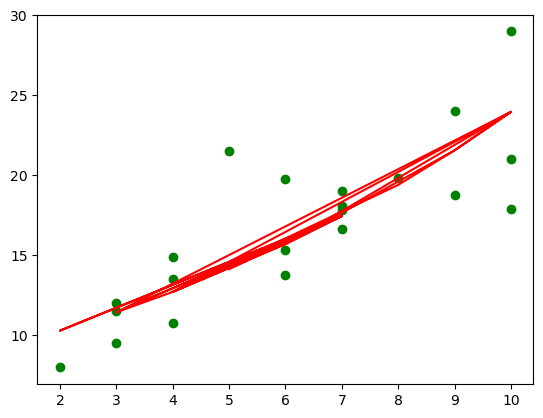

In [45]:
plt.scatter(x=dataset['sorting_time'],y=dataset['delivery_time'],color='green');
plt.plot(dataset['sorting_time'],pred3,color='red')

In [46]:
resid_3 = pred3-dataset.delivery_time
resid_3

0     2.972032
1    -0.774877
2    -4.033966
3    -2.429293
4    -5.027968
5     0.366034
6    -1.534403
7     1.950423
8     6.072032
9     2.820707
10   -0.420073
11    1.975123
12    0.785597
13   -0.049577
14   -0.579577
15   -2.154877
16    1.966034
17   -0.644403
18    2.303411
19   -0.364403
20   -7.358272
dtype: float64

In [47]:
dt_resid=model_3.resid_pearson
dt_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])